In [3]:
import wave
import numpy as np
import scipy.signal as signal

framerate = 44100
time = 10

t = np.arange(0, time, 1.0/framerate)
wave_data = signal.chirp(t,f0=293.67,t1=10,f1=293.67, method='linear') * 1000
wave_data = wave_data.astype(np.short)

f = wave.open(r"fa.wav", "wb")

f.setnchannels(1)
f.setsampwidth(2)
f.setframerate(framerate)
f.writeframes(wave_data.tostring())
f.close()

<ipython-input-3-a9e211f2c1e0>:17: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  f.writeframes(wave_data.tostring())


Exception ignored in: <function Wave_write.__del__ at 0x000002EC321D4940>
Traceback (most recent call last):
  File "D:\zhangguoqing\lib\wave.py", line 327, in __del__
    self.close()
  File "D:\zhangguoqing\lib\wave.py", line 444, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'
<ipython-input-4-71ae73af7a12>:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype=np.short)


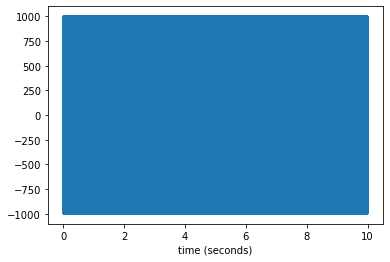

In [4]:
import wave
import pylab as pl
import numpy as np

# 打开WAV文档
f = wave.open("fa.wav", "rb")

# 读取格式信息
# (nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]

# 读取波形数据
str_data = f.readframes(nframes)
f.close()

#将波形数据转换为数组
wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = -1,1
time = np.arange(0, nframes) * (1.0 / framerate)

# 绘制波形
pl.subplot(111) 
pl.plot(time, wave_data)
pl.xlabel("time (seconds)")
pl.show()